In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gp

In [2]:
years = [2018,2019,2020]
tods = [1,2,3,4,5]


In [3]:
def assign_data(row, data):
    row = row.append(data.loc[row['ORIGIN']])
    return row

In [4]:
#tracts = pd.read_csv('points.csv', index_col = 0)
#tracts = tracts.drop(['X','Y'],axis = 1)
#tracts['ALT'] = range(1,len(tracts)+1)

In [10]:
empty = pd.read_csv('C:/Workspace/TNC-Demand-Model/Inputs/Chicago Ride-Hailing/Empty_Chicago_Matrix.csv', index_col = 0 )

#empty = empty.groupby(by = ['ORIGIN','MONTH','YEAR','TOD'], as_index = False).first()

C:\Users\ramu225\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [11]:
len(empty)

51328080

In [12]:
empty.head()

,DESTINATION,ORIGIN,MONTH,YEAR,TOD
0,17031842400,17031842400,11,2018,1
1,17031840300,17031842400,11,2018,1
2,17031841100,17031842400,11,2018,1
3,17031841200,17031842400,11,2018,1
4,17031839000,17031842400,11,2018,1


In [14]:
years = [2018,2019,2020]
tods = [1,2,3,4,5]
df2 = pd.DataFrame()
airport_list = [17031980000,17031980100]
tourist_list = [17031081402,17031330100,17031841000]

for year in years:
    print('Working on Year '+ (str(year)))
    if year == 2018:
        months = [11,12]
    elif year == 2019:
        months = [1,2,3,4,5,6,7,8,9,10,11,12]
    elif year == 2020:
        months = [1,2]
    else:
        print('Bad Year')
        
    for month in months:
        print('Working on Month '+ (str(month)))
    
        for tod in tods:
            print('Working on TOD '+ (str(tod)))
        
            ls = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Destination Choice Model Matricies/Log Sum/Log_Sum_'+ str(year) + '_' + str(month) + '_' + str(tod) + '.csv', index_col = 0)
            dropoffs = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Destination Choice Model Matricies/Estimated Dropoffs/' + str(year) + '_' + str(month) + '_' + str(tod) + '_Dropoffs.csv', index_col = 0)

            df = empty.merge(dropoffs, on = ['YEAR','MONTH','TOD','ORIGIN','DESTINATION'])
            df = df.merge(ls[['YEAR','MONTH','TOD','ORIGIN','DESTINATION','LOG_SUM']], on = ['YEAR','MONTH','TOD','ORIGIN','DESTINATION'])

            df2 = df2.append(df)

dist = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Distance_Matrix.csv')
df2 = df2.merge(dist, on = ['ORIGIN','DESTINATION'])            

df2['INTERNAL_FLAGGER'] = np.where(df2['ORIGIN'] == df2['DESTINATION'],1,0)
df2['AIRPORT_FLAGGER'] = np.where(df2['DESTINATION'].isin(airport_list),1,0)
df2['TOURIST_FLAGGER'] = np.where(df2['DESTINATION'].isin(tourist_list),1,0)


Working on Year 2018
Working on Month 11
Working on TOD 1
Working on TOD 2
Working on TOD 3
Working on TOD 4
Working on TOD 5
Working on Month 12
Working on TOD 1
Working on TOD 2
Working on TOD 3
Working on TOD 4
Working on TOD 5
Working on Year 2019
Working on Month 1
Working on TOD 1
Working on TOD 2
Working on TOD 3
Working on TOD 4
Working on TOD 5
Working on Month 2
Working on TOD 1
Working on TOD 2
Working on TOD 3
Working on TOD 4
Working on TOD 5
Working on Month 3
Working on TOD 1
Working on TOD 2
Working on TOD 3
Working on TOD 4
Working on TOD 5
Working on Month 4
Working on TOD 1
Working on TOD 2
Working on TOD 3
Working on TOD 4
Working on TOD 5
Working on Month 5
Working on TOD 1
Working on TOD 2
Working on TOD 3
Working on TOD 4
Working on TOD 5
Working on Month 6
Working on TOD 1
Working on TOD 2
Working on TOD 3
Working on TOD 4
Working on TOD 5
Working on Month 7
Working on TOD 1
Working on TOD 2
Working on TOD 3
Working on TOD 4
Working on TOD 5
Working on Month 8
W

In [15]:
df2.head()

,DESTINATION,ORIGIN,MONTH,YEAR,TOD,Unnamed: 0.1,DROPOFFS_AVG,PRED_DROPOFFS,LOG_SUM,DISTANCE,INTERNAL_FLAGGER,AIRPORT_FLAGGER,TOURIST_FLAGGER
0,17031842400,17031842400,11,2018,1,784,0.045455,0.199378,-0.124957,0.0,1,0,0
1,17031842400,17031842400,11,2018,2,784,0.545455,0.653743,-0.145677,0.0,1,0,0
2,17031842400,17031842400,11,2018,3,2386,1.272727,1.942026,-0.141584,0.0,1,0,0
3,17031842400,17031842400,11,2018,4,3187,0.363636,0.600135,-0.151391,0.0,1,0,0
4,17031842400,17031842400,11,2018,5,3988,0.136364,0.551210,-0.129843,0.0,1,0,0


In [16]:
len(df2)

51328080

In [13]:
df2['LOG_SUM_AIRPORTS'] = df2['LOG_SUM']*df2['AIRPORT_FLAGGER']

In [14]:
df2['LOG_SUM_NO_AIRPORTS'] = df2['LOG_SUM']*(1-df2['AIRPORT_FLAGGER'])

In [15]:
df2['LOG_SUM_AIRPORTS'].mean()

-0.01872228740388578

In [17]:
#df2.to_csv('Trip_Distribution_Estimation_File.csv')

In [4]:
#df2 = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Distribution_Estimation_File.csv')

In [ ]:
print('Working on TOD 1')
df2['UTILITY'] = np.where(df2['TOD'] == 1, np.log(df2['PRED_DROPOFFS']) - 2.81*df2['AIRPORT_FLAGGER'] + 0.49*df2['TOURIST_FLAGGER'] - 0.07*df2['INTERNAL_FLAGGER'] + 0*df2['LOG_SUM_AIRPORTS'] + 1*df2['LOG_SUM_NO_AIRPORTS'], np.nan)
print('Working on TOD 2')

df2['UTILITY'] = np.where(df2['TOD'] == 2, np.log(df2['PRED_DROPOFFS']) - 2.18*df2['AIRPORT_FLAGGER'] + 0.47*df2['TOURIST_FLAGGER'] - 0.80*df2['INTERNAL_FLAGGER'] + 0.15*df2['LOG_SUM_AIRPORTS'] + 0.85*df2['LOG_SUM_NO_AIRPORTS'], df2['UTILITY'])
print('Working on TOD 3')

df2['UTILITY'] = np.where(df2['TOD'] == 3, np.log(df2['PRED_DROPOFFS']) - 2.84*df2['AIRPORT_FLAGGER'] + 0.48*df2['TOURIST_FLAGGER'] - 1.22*df2['INTERNAL_FLAGGER'] + 0.08*df2['LOG_SUM_AIRPORTS'] + 0.96*df2['LOG_SUM_NO_AIRPORTS'], df2['UTILITY'])
print('Working on TOD 4')

df2['UTILITY'] = np.where(df2['TOD'] == 4, np.log(df2['PRED_DROPOFFS']) - 1.95*df2['AIRPORT_FLAGGER'] + 0.23*df2['TOURIST_FLAGGER'] - 1.20*df2['INTERNAL_FLAGGER'] + 0.12*df2['LOG_SUM_AIRPORTS'] + 0.72*df2['LOG_SUM_NO_AIRPORTS'], df2['UTILITY'])
print('Working on TOD 5')

df2['UTILITY'] = np.where(df2['TOD'] == 5, np.log(df2['PRED_DROPOFFS']) - 2.18*df2['AIRPORT_FLAGGER'] + 0.30*df2['TOURIST_FLAGGER'] - 1.06*df2['INTERNAL_FLAGGER'] + 0.16*df2['LOG_SUM_AIRPORTS'] + 0.91*df2['LOG_SUM_NO_AIRPORTS'], df2['UTILITY'])


In [ ]:
df2.head()

In [ ]:
df2.DISTANCE.mean()

In [382]:
#TRY DIFFERENT DISTANCE COEFFICIENTS TO MATCH TRIP DISTRIBUTION
#df2['UTILITY'] = np.where(df2['DISTANCE'] < 1, df2['UTILITY'] - 1 * df2['DISTANCE'], df2['UTILITY'])

In [6]:
df2['EXP_UTILITY'] = np.exp(df2['UTILITY'])

In [7]:
util_sum = df2[['ORIGIN','MONTH','YEAR','TOD','EXP_UTILITY']].groupby(by =['ORIGIN','MONTH','YEAR','TOD'],as_index = False).sum()

In [8]:
df2 = df2.merge(util_sum, how = 'left', on = ['ORIGIN','MONTH','YEAR','TOD'], suffixes = ('','_SUM'))

In [9]:
df2['SHARE'] = df2['EXP_UTILITY']/df2['EXP_UTILITY_SUM']

In [18]:
df2.SHARE.sum()

64079.99999999999

In [11]:
df2.head()

,Unnamed: 0,DESTINATION,ORIGIN,MONTH,YEAR,TOD,Unnamed: 0.1,DROPOFFS_AVG,PRED_DROPOFFS,LOG_SUM,DISTANCE,INTERNAL_FLAGGER,AIRPORT_FLAGGER,TOURIST_FLAGGER,LOG_SUM_AIRPORTS,LOG_SUM_NO_AIRPORTS,UTILITY,EXP_UTILITY,EXP_UTILITY_SUM,SHARE
0,0,17031842400,17031842400,11,2018,1,784,0.045455,0.199378,-0.124957,0.0,1,0,0,-0.0,-0.124957,-1.807508,0.164062,8.343480,0.019664
1,1,17031842400,17031842400,11,2018,2,784,0.545455,0.653743,-0.145677,0.0,1,0,0,-0.0,-0.145677,-1.348867,0.259534,4.688809,0.055352
2,2,17031842400,17031842400,11,2018,3,2386,1.272727,1.942026,-0.141584,0.0,1,0,0,-0.0,-0.141584,-0.692189,0.500479,9.077959,0.055131
3,3,17031842400,17031842400,11,2018,4,3187,0.363636,0.600135,-0.151391,0.0,1,0,0,-0.0,-0.151391,-1.819603,0.162090,10.519487,0.015409
4,4,17031842400,17031842400,11,2018,5,3988,0.136364,0.551210,-0.129843,0.0,1,0,0,-0.0,-0.129843,-1.773796,0.169688,10.075633,0.016841


In [12]:
len(df2)

51328080

In [27]:
pred_pickups = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Predicted_Pickups.csv', index_col = 0)

In [28]:
len(pred_pickups)

64080

In [29]:
pred_pickups.head()

,YEAR,MONTH,TOD,ORIGIN,PRED_PICKUPS,PICKUPS,AVG_WD_PICKUPS
0,2018,11,1,17031010100,13.520988,1280.0,58.181818
1,2018,11,1,17031010201,21.980578,1377.0,62.590909
2,2018,11,1,17031010202,14.393246,1271.0,57.772727
3,2018,11,1,17031010300,20.273000,1454.0,66.090909
4,2018,11,1,17031010400,44.705047,2163.0,98.318182


In [30]:
pred_pickups.PRED_PICKUPS.sum()

4238853.553437324

In [31]:
pred_pickups.groupby(by = ['YEAR','MONTH','TOD']).sum()

ORIGIN  PRED_PICKUPS    PICKUPS  AVG_WD_PICKUPS
YEAR MONTH TOD                                                         
2018 11    1    13642155690529  41938.871108   857885.0    38994.772727
           2    13642155690529  37704.380448   762973.0    34680.590909
           3    13642155690529  83215.855069  1731054.0    78684.272727
           4    13642155690529  53631.941927  1126522.0    51205.545455
           5    13642155690529  52193.612193  1085431.0    49337.772727
...                        ...           ...        ...             ...
2020 2     1    13642155690529  35552.029907   742491.0    37124.550000
           2    13642155690529  38097.903560   767668.0    38383.400000
           3    13642155690529  81798.258585  1685810.0    84290.500000
           4    13642155690529  51063.690298  1045171.0    52258.550000
           5    13642155690529  48306.704467  1026731.0    51336.550000

[80 rows x 4 columns]

In [33]:
df2 = df2.merge(pred_pickups, how = 'left', on = ['ORIGIN','YEAR','MONTH','TOD'])

In [396]:
df3.head()

,DESTINATION,ORIGIN,MONTH,YEAR,TOD,Unnamed: 0.1,DROPOFFS_AVG,PRED_DROPOFFS,LOG_SUM,DISTANCE,...,TOURIST_FLAGGER,UTILITY,EXP_UTILITY,LOGSUM_AIRPORTS,LOGSUM_NO_AIRPORTS,LOG_SUM_AIRPORTS,LOG_SUM_NO_AIRPORTS,EXP_UTILITY_SUM,SHARE,PRED_PICKUPS
0,17031842400,17031842400,11,2018,1,784,0.045455,0.199378,-0.124957,0.0,...,0,-1.807508,0.164062,-0.0,-0.124957,-0.0,-0.124957,8.343480,0.019664,0.165677
1,17031842400,17031842400,11,2018,2,784,0.545455,0.653743,-0.145677,0.0,...,0,-1.348867,0.259534,-0.0,-0.145677,-0.0,-0.145677,4.688809,0.055352,0.203454
2,17031842400,17031842400,11,2018,3,2386,1.272727,1.942026,-0.141584,0.0,...,0,-0.692189,0.500479,-0.0,-0.141584,-0.0,-0.141584,9.077959,0.055131,0.669257
3,17031842400,17031842400,11,2018,4,3187,0.363636,0.600135,-0.151391,0.0,...,0,-1.819603,0.162090,-0.0,-0.151391,-0.0,-0.151391,10.519487,0.015409,0.460589
4,17031842400,17031842400,11,2018,5,3988,0.136364,0.551210,-0.129843,0.0,...,0,-1.773796,0.169688,-0.0,-0.129843,-0.0,-0.129843,10.075633,0.016841,0.093199


In [34]:
df2.SHARE.sum()

64079.99999999999

In [35]:
df2['PRED_TRIPS'] = df2['PRED_PICKUPS']*df2['SHARE']

In [36]:
df2['PRED_TRIPS'].sum()

4238853.553437344

In [37]:
pred_pickups.PRED_PICKUPS.sum()

4238853.553437324

In [39]:
#output = df2[['YEAR','MONTH','TOD','ORIGIN','DESTINATION','PRED_TRIPS','DISTANCE']]
#output['TRAVELED_MILES_PRED'] = output['PRED_TRIPS']*output['DISTANCE']

In [ ]:
df2[['YEAR','MONTH','TOD','ORIGIN','DESTINATION','PRED_TRIPS','DISTANCE']].to_csv('Trip_Distribution_Predicted_Trips.csv')

In [419]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51328080 entries, 0 to 51328079
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   TOD                  int64  
 3   ORIGIN               int64  
 4   DESTINATION          int64  
 5   PRED_TRIPS           float64
 6   DISTANCE             float64
 7   TRAVELED_MILES_PRED  float64
dtypes: float64(3), int64(5)
memory usage: 3.4 GB


In [484]:
#output.to_csv('output.csv')

In [ ]:
agg = {'PRED_TRIPS':'sum','DISTANCE':'mean'}

In [ ]:
grouped = output[['ORIGIN','DESTINATION','DISTANCE','PRED_TRIPS']].groupby(by = ['ORIGIN','DESTINATION'], as_index = False).agg(agg)

In [406]:
grouped.head()

,ORIGIN,DESTINATION,PRED_TRIPS,DISTANCE
0,17031010100,17031010100,0.244221,0.000000
1,17031010100,17031010201,0.230857,0.642447
2,17031010100,17031010202,0.319371,0.401739
3,17031010100,17031010300,0.647644,0.404804
4,17031010100,17031010400,0.670910,1.272078


In [407]:
#grouped['DISTANCE_SCALED'] = grouped['DISTANCE']*grouped['PRED_TRIPS']

In [ ]:
grouped.to_csv('dist_file.csv')

In [32]:
df3.columns

Index(['DESTINATION', 'ORIGIN', 'MONTH', 'YEAR', 'TOD', 'Unnamed: 0.1',
       'DROPOFFS_AVG', 'PRED_DROPOFFS', 'LOG_SUM', 'DISTANCE',
       'INTERNAL_FLAGGER', 'AIRPORT_FLAGGER', 'TOURIST_FLAGGER', 'UTILITY',
       'EXP_UTILITY', 'EXP_UTILITY_SUM', 'SHARE', 'PRED_PICKUPS',
       'PRED_TRIPS'],
      dtype='object')

In [ ]:
dist = pd.read_csv('Distance_Matrix.csv')

In [451]:
output = df3[['YEAR','MONTH','TOD','ORIGIN','DESTINATION','PRED_TRIPS','DISTANCE']]

In [423]:
#output['TRAVELED_MILES_PRED'] = output['PRED_TRIPS']*output['DISTANCE']

In [424]:
len(output)

51328080

In [425]:
output.DISTANCE.value_counts()

0.000000     64080
13.933132      320
7.704492       320
14.666032      320
13.647344      320
             ...  
5.509519       160
4.519533       160
8.145539       160
4.864367       160
6.515879       160
Name: DISTANCE, Length: 320391, dtype: int64

In [452]:
output.DISTANCE.mean()

8.416995024901455

In [453]:
output.PRED_TRIPS.sum()

38880.176885529334

In [427]:
len(output)

51328080

In [458]:
obs = pd.read_csv('Sample.csv')

In [459]:
obs_filtered = obs[obs['TRIP_LENGTH_MILES']<50]

In [460]:
obs_filtered['OBS_TRIPS'] = 1

C:\Users\Transportlab\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [461]:
obs_filtered['TOD'] = np.where(obs_filtered['TOD_1'] == 1,1,np.nan)
obs_filtered['TOD'] = np.where(obs_filtered['TOD_2'] == 1,2, obs_filtered['TOD'])
obs_filtered['TOD'] = np.where(obs_filtered['TOD_3'] == 1,3, obs_filtered['TOD'])
obs_filtered['TOD'] = np.where(obs_filtered['TOD_4'] == 1,4, obs_filtered['TOD'])
obs_filtered['TOD'] = np.where(obs_filtered['TOD_5'] == 1,5, obs_filtered['TOD'])

C:\Users\Transportlab\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Transportlab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Transportlab\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [462]:
obs_filtered[obs_filtered['TRIP_LENGTH_MILES'] >15].AIRPORT_FLAGGER.sum()/len(obs_filtered[obs_filtered['TRIP_LENGTH_MILES'] >15])

0.6925019915674121

In [463]:
obs_filtered[obs_filtered['TRIP_LENGTH_MILES'] <15].AIRPORT_FLAGGER.sum()/len(obs_filtered[obs_filtered['TRIP_LENGTH_MILES'] <15])

0.01602928739705616

In [464]:
obs_filtered = obs_filtered[['MONTH','YEAR','TOD','ORIGIN','DESTINATION','OBS_TRIPS']].groupby(by = ['ORIGIN','DESTINATION','YEAR','MONTH','TOD',], as_index = False).sum()

In [465]:
wd = pd.read_csv('Number of Weekdays.csv')

In [466]:
wd.head()

,YEAR,MONTH,WEEKDAYS
0,2018,11,22
1,2018,12,21
2,2019,1,23
3,2019,2,20
4,2019,3,21


In [467]:
obs_filtered = obs_filtered.merge(wd, on =['YEAR','MONTH'])

In [468]:
obs_filtered['OBS_TRIPS_AVG'] = obs_filtered['OBS_TRIPS']/obs_filtered['WEEKDAYS']

In [469]:
obs_filtered.OBS_TRIPS_AVG.sum()

39092.96952757388

In [470]:
len(obs_filtered)

538197

In [471]:
output['ORIGIN']

0           17031842400
1           17031842400
2           17031842400
3           17031842400
4           17031842400
               ...     
51328075    17031630900
51328076    17031630900
51328077    17031630900
51328078    17031630900
51328079    17031630900
Name: ORIGIN, Length: 51328080, dtype: int64

In [472]:
obs_filtered[(obs_filtered['ORIGIN'] == 17031842400)&(obs_filtered['DESTINATION'] == 17031842400)&(obs_filtered['MONTH'] == 12)&(obs_filtered['YEAR'] == 2018)]

,ORIGIN,DESTINATION,YEAR,MONTH,TOD,OBS_TRIPS,WEEKDAYS,OBS_TRIPS_AVG
63495,1.703184e+10,1.703184e+10,2018,12,2.0,2,21,0.095238
63496,1.703184e+10,1.703184e+10,2018,12,3.0,3,21,0.142857
63497,1.703184e+10,1.703184e+10,2018,12,4.0,1,21,0.047619
63498,1.703184e+10,1.703184e+10,2018,12,5.0,1,21,0.047619


In [473]:
output = output.merge(obs_filtered[['MONTH','YEAR','TOD','ORIGIN','DESTINATION','OBS_TRIPS_AVG']], how = 'left', on = ['MONTH','YEAR','TOD','ORIGIN','DESTINATION'])

In [474]:
output.PRED_TRIPS.sum()

38880.176885529334

In [475]:
output['OBS_TRIPS_AVG'] = output['OBS_TRIPS_AVG'].fillna(0)

In [476]:
output['TRAVELED_MILES_OBS'] = output['OBS_TRIPS_AVG']*output['DISTANCE']

In [477]:
len(output)

51328080

In [478]:
output.head()

,YEAR,MONTH,TOD,ORIGIN,DESTINATION,PRED_TRIPS,DISTANCE,OBS_TRIPS_AVG,TRAVELED_MILES_OBS
0,2018,11,1,17031842400,17031842400,0.003258,0.0,0.000000,0.0
1,2018,11,2,17031842400,17031842400,0.011262,0.0,0.000000,0.0
2,2018,11,3,17031842400,17031842400,0.036897,0.0,0.045455,0.0
3,2018,11,4,17031842400,17031842400,0.007097,0.0,0.000000,0.0
4,2018,11,5,17031842400,17031842400,0.001570,0.0,0.000000,0.0


In [479]:
df3['PRED_TRIPS'].sum()

38880.176885529334

In [480]:
output['OBS_TRIPS_AVG'].sum()

39092.96952757384

In [60]:
len(output)

51328080

(0, 7)

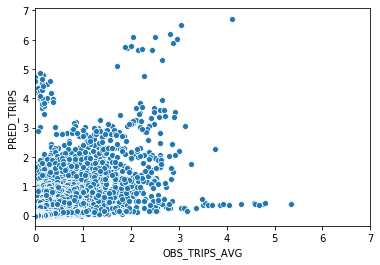

In [489]:
sns.scatterplot(y = output['PRED_TRIPS'], x = output['OBS_TRIPS_AVG'])

plt.xlim(0,7)

In [490]:
output.head()

,YEAR,MONTH,TOD,ORIGIN,DESTINATION,PRED_TRIPS,DISTANCE,OBS_TRIPS_AVG,TRAVELED_MILES_OBS
0,2018,11,1,17031842400,17031842400,0.003258,0.0,0.000000,0.0
1,2018,11,2,17031842400,17031842400,0.011262,0.0,0.000000,0.0
2,2018,11,3,17031842400,17031842400,0.036897,0.0,0.045455,0.0
3,2018,11,4,17031842400,17031842400,0.007097,0.0,0.000000,0.0
4,2018,11,5,17031842400,17031842400,0.001570,0.0,0.000000,0.0


In [491]:
len(output)

51328080

NameError: name 'output' is not defined

In [83]:
output = pd.read_csv('Trip_Distribution_Predicted_Trips.csv')

In [84]:
airport_tracts = [17031980000,17031980100]
tourist_tracts = [17031081402,17031330100,17031841000]
downtown_tracts = pd.read_csv('Downtown Zone Census Tracts.csv')
downtown_tracts = list(downtown_tracts['geoid10'])

In [85]:
tourist_tracts

[17031081402, 17031330100, 17031841000]

In [86]:
downtown_tracts.remove(17031081402)

In [87]:
output['PRED_TRIPS'].sum()

38880.17688552933

In [88]:
output['OBS_TRIPS_AVG'].sum()

39092.96952757384

In [89]:
output[output['DESTINATION'].isin(downtown_tracts)]['PRED_TRIPS'].sum()

17029.987601829816

In [90]:
output[output['DESTINATION'].isin(downtown_tracts)]['PRED_TRIPS'].sum()/output['PRED_TRIPS'].sum()

0.4380120916622719

In [91]:
output[output['DESTINATION'].isin(downtown_tracts)]['OBS_TRIPS_AVG'].sum()

14010.51325992847

In [92]:
output[output['DESTINATION'].isin(downtown_tracts)]['OBS_TRIPS_AVG'].sum()/output['OBS_TRIPS_AVG'].sum()

0.3583895884411209

In [93]:
output[output['DESTINATION'].isin(tourist_tracts)]['PRED_TRIPS'].sum()

965.4788405346036

In [94]:
output[output['DESTINATION'].isin(tourist_tracts)]['PRED_TRIPS'].sum()/output['PRED_TRIPS'].sum()

0.02483216173056923

In [95]:
output[output['DESTINATION'].isin(tourist_tracts)]['OBS_TRIPS_AVG'].sum()

943.4780538302277

In [96]:
output[output['DESTINATION'].isin(tourist_tracts)]['OBS_TRIPS_AVG'].sum()/output['OBS_TRIPS_AVG'].sum()

0.024134213011491868

In [97]:
output[output['DESTINATION'].isin(airport_tracts)]['PRED_TRIPS'].sum()

1996.6114577913622

In [98]:
output[output['DESTINATION'].isin(airport_tracts)]['PRED_TRIPS'].sum()/output['PRED_TRIPS'].sum()

0.05135294172322744

In [99]:
output[output['DESTINATION'].isin(airport_tracts)]['OBS_TRIPS_AVG'].sum()

1492.9465556182947

In [100]:
output[output['DESTINATION'].isin(airport_tracts)]['OBS_TRIPS_AVG'].sum()/output['OBS_TRIPS_AVG'].sum()

0.03818964314197875

In [101]:
output[(~output['DESTINATION'].isin(airport_tracts+tourist_tracts+downtown_tracts))]['PRED_TRIPS'].sum()

18888.098985373366

In [102]:
output[(~output['DESTINATION'].isin(airport_tracts+tourist_tracts+downtown_tracts))]['PRED_TRIPS'].sum()/output['PRED_TRIPS'].sum()

0.48580280488392685

In [103]:
output[(~output['DESTINATION'].isin(airport_tracts+tourist_tracts+downtown_tracts))]['OBS_TRIPS_AVG'].sum()

22646.031658196804

In [104]:
output[(~output['DESTINATION'].isin(airport_tracts+tourist_tracts+downtown_tracts))]['OBS_TRIPS_AVG'].sum()/output['OBS_TRIPS_AVG'].sum()

0.5792865554054073

In [105]:
tracts = gp.read_file('geo_export_558aad9f-98d8-4dd5-a6b1-c1730155d596.shp')

In [106]:
output['GEOID10_STR'] = output.DESTINATION.astype(str)

In [111]:
agg = {'PRED_TRIPS':'sum','GEOID10_STR':'first','OBS_TRIPS_AVG':'sum'}

In [112]:
output2 =output[['DESTINATION','PRED_TRIPS','GEOID10_STR','OBS_TRIPS_AVG']].groupby(by = ['DESTINATION'], as_index = False).agg(agg)

In [113]:
output2['DIFF'] = output2['PRED_TRIPS'] - output2['OBS_TRIPS_AVG']

In [114]:
output2['DIFF'].min()

-346.37095761165915

In [115]:
output2['DIFF'].mean()

-0.2656587291442134

In [116]:
output2['DIFF'].max()

460.49412988018156

In [117]:
tracts['GEOID10_STR'] = tracts.geoid10.astype(str)

In [69]:
import folium

# Add the color for the chloropleth:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m.choropleth(
 geo_data=tracts,
 name= 'Dropoffs Diff',
 data=output2,
 columns = ['GEOID10_STR', 'DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 #bins = bins,
 legend_name= 'Dropoff Totals Diff',
 highlight = True
)

#feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

#for tract2 in centroids.GEOID:
 #   row = centroids[centroids['GEOID'] == tract2]
  #  folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

#m.add_child(feature_group)

#folium.LayerControl().add_to(m)

m.save('Trip_Distribution_Diff_Map.html')


In [71]:
output2['P_DIFF'] = np.where(output2['OBS_TRIPS_AVG'] == 0, 0, output2['DIFF']/output2['OBS_TRIPS_AVG'])

In [82]:
output2[output2['P_DIFF'] > 5]

,DESTINATION,PRED_TRIPS,GEOID10_STR,OBS_TRIPS_AVG,DIFF,P_DIFF
37,17031030702,31.188360,17031030702,3.234820,27.953540,8.641451
143,17031090100,4.368767,17031090100,0.470723,3.898044,8.280976
145,17031090300,9.122039,17031090300,0.329814,8.792225,26.658160
146,17031100100,28.214774,17031100100,4.057133,24.157641,5.954362
147,17031100200,28.404281,17031100200,3.983060,24.421221,6.131270
...,...,...,...,...,...,...
742,17031836900,7.191344,17031836900,1.103858,6.087486,5.514734
746,17031837400,91.210699,17031837400,6.470224,84.740475,13.096993
769,17031840800,8.770345,17031840800,0.873697,7.896649,9.038205
776,17031841600,2.936812,17031841600,0.427649,2.509163,5.867341


In [73]:
output2.P_DIFF.min()

-0.930883468080833

In [74]:
output2.P_DIFF.max()

84.82794274055904

In [75]:
output2.P_DIFF.mean()

1.608265847165933

In [78]:

bins = [-1,-0.1,0.1,1,85]
# Add the color for the chloropleth:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m.choropleth(
 geo_data=tracts,
 name= 'Dropoffs Percent Diff',
 data=output2,
 columns = ['GEOID10_STR', 'P_DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name= 'Dropoff Percent Diff',
 highlight = True
)

#feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

#for tract2 in centroids.GEOID:
 #   row = centroids[centroids['GEOID'] == tract2]
  #  folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

#m.add_child(feature_group)

#folium.LayerControl().add_to(m)

m.save('Trip_Distribution_Percent_Diff_Map.html')
